In [10]:
# ---- Build df once in this notebook ----
import pandas as pd
from pathlib import Path

DATA_DIR = Path("../data")
FILES = sorted(DATA_DIR.glob("D2_*.csv"))  # 2. Bundesliga

def load_fd(paths):
    dfs = []
    for p in paths:
        d = pd.read_csv(p)
        d.columns = [c.strip() for c in d.columns]
        if "Date" in d.columns:
            d["Date"] = pd.to_datetime(d["Date"], dayfirst=True, errors="coerce")
        dfs.append(d)
    df = (pd.concat(dfs, ignore_index=True)
            .sort_values("Date")
            .dropna(subset=["HomeTeam","AwayTeam","FTR","FTHG","FTAG"]))
    return df

def season_from_date(dt):
    y = dt.year
    s = y if dt.month >= 7 else y-1
    return f"{str(s)[-2:]}-{str(s+1)[-2:]}"

df = load_fd(FILES)
df["Season"] = df["Date"].apply(season_from_date)
df["HomePoints"] = df["FTR"].map({"H":3,"D":1,"A":0})
df["AwayPoints"] = df["FTR"].map({"H":0,"D":1,"A":3})
df["GD"] = df["FTHG"] - df["FTAG"]
df["CompletedSeason"] = df["Season"].ne("25-26")  # alles außer laufender Saison


In [11]:
import sys
sys.path.insert(0, "../src") 

from league_tables import season_table, tables_all_seasons, all_time_table


# Beispiel: nur abgeschlossene Saisons
df_done = df[df["CompletedSeason"]].copy()

# Saison-Tabelle 22/23
table_22_23 = season_table(df_done, "22-23")
display(table_22_23.head(10))

# Tabellen für alle Saisons
tables_seasons = tables_all_seasons(df_done)
display(tables_seasons.head(20))

# All-Time Tabelle (alle Saisons zusammen)
table_alltime = all_time_table(df_done)
display(table_alltime.head(20))


,Pos,MP,W,D,L,GF,GA,GD,Pts,PPG,Team
0,1,34,19,10,5,67,36,31,67,1.971,NaN
1,2,34,20,7,7,50,33,17,67,1.971,Heidenheim
2,3,34,20,6,8,70,45,25,66,1.941,Darmstadt
3,4,34,17,7,10,60,43,17,58,1.706,Hamburg
4,5,34,16,10,8,55,39,16,58,1.706,Fortuna Dusseldorf
5,6,34,16,7,11,68,44,24,55,1.618,St Pauli
6,7,34,13,7,14,56,53,3,46,1.353,Paderborn
7,8,34,12,10,12,58,61,-3,46,1.353,Karlsruhe
8,9,34,11,12,11,47,48,-1,45,1.324,Holstein Kiel
9,10,34,12,8,14,50,55,-5,44,1.294,Kaiserslautern


,Season,Pos,Team,MP,W,D,L,GF,GA,GD,Pts,PPG
6,18-19,1,FC Koln,34,19,6,9,84,47,37,63,1.853
13,18-19,2,Paderborn,34,16,9,9,76,50,26,57,1.676
17,18-19,3,Union Berlin,34,14,15,5,54,33,21,57,1.676
8,18-19,4,Hamburg,34,16,8,10,45,42,3,56,1.647
9,18-19,5,Heidenheim,34,15,10,9,55,45,10,55,1.618
10,18-19,6,Holstein Kiel,34,13,10,11,60,51,9,49,1.441
0,18-19,7,Bielefeld,34,13,10,11,52,50,2,49,1.441
14,18-19,8,Regensburg,34,12,13,9,55,54,1,49,1.441
16,18-19,9,St Pauli,34,14,7,13,46,53,-7,49,1.441
2,18-19,10,Darmstadt,34,13,7,14,45,53,-8,46,1.353


,Pos,Team,GF,GA,W,D,L,Pts,MP,GD,PPG
0,1,Hamburg,457,300,115,66,57,411,238,157,1.727
1,2,St Pauli,316,280,88,55,61,319,204,36,1.564
2,3,Darmstadt,333,285,90,48,66,318,204,48,1.559
3,4,Paderborn,363,283,87,56,61,317,204,80,1.554
4,5,Holstein Kiel,339,296,87,52,65,313,204,43,1.534
5,6,Karlsruhe,331,311,73,64,67,283,204,20,1.387
6,7,Heidenheim,259,211,79,43,48,280,170,48,1.647
7,8,Greuther Furth,294,303,73,61,70,280,204,-9,1.373
8,9,Hannover,292,284,74,57,73,279,204,8,1.368
9,10,Fortuna Dusseldorf,289,223,76,46,48,274,170,66,1.612


In [8]:
import sys, importlib, os
sys.path.insert(0, "../src")

import league_tables
print("geladen aus:", league_tables.__file__)
print("Symbole:", [n for n in dir(league_tables) if not n.startswith("_")])



geladen aus: c:\Users\admin\IdeaProjects\fussball-projekt\notebooks\../src\league_tables.py
Symbole: ['all_time_table', 'long_results', 'np', 'pd', 'season_table', 'tables_all_seasons']


In [12]:
import pandas as pd
import numpy as np

# ---- Helfer: Saison-Endtabelle (gesamt) und Heim-PPG je Team bauen ----
def season_full_table(df, season):
    d = df[df["Season"]==season]
    # long: Heim/Auswärts in Team-Zeilen
    home = pd.DataFrame({
        "Team": d["HomeTeam"], "MP": 1,
        "Pts": d["FTR"].map({"H":3,"D":1,"A":0}).astype(int),
        "GF": d["FTHG"], "GA": d["FTAG"]
    })
    away = pd.DataFrame({
        "Team": d["AwayTeam"], "MP": 1,
        "Pts": d["FTR"].map({"A":3,"D":1,"H":0}).astype(int),
        "GF": d["FTAG"], "GA": d["FTHG"]
    })
    long = pd.concat([home,away], ignore_index=True)

    tab = long.groupby("Team", as_index=False).sum(numeric_only=True)
    tab["GD"] = tab["GF"] - tab["GA"]
    tab = tab.sort_values(["Pts","GD","GF"], ascending=[False,False,False]).reset_index(drop=True)
    tab["Pos"] = tab.index + 1
    return tab[["Pos","Team","MP","Pts","GD","GF","GA"]]

def season_home_ppg(df, season):
    d = df[df["Season"]==season]
    h = d.groupby("HomeTeam").agg(HomePts=("FTR", lambda s: (s=="H").sum()*3 + (s=="D").sum()),
                                  HMP=("FTR","count")).reset_index()
    h["PPG_H"] = h["HomePts"]/h["HMP"]
    return h.rename(columns={"HomeTeam":"Team"})[["Team","PPG_H"]]

# ---- Kernfunktion: stärkste Heim-NICHT-Aufsteiger & schwächste Heim-Aufsteiger ----
def promotion_home_outliers(df, season, promoted_slots=2):
    full = season_full_table(df, season)
    home = season_home_ppg(df, season)
    m = full.merge(home, on="Team", how="left")

    promoted = m[m["Pos"] <= promoted_slots].copy()
    non_prom = m[m["Pos"] > promoted_slots].copy()

    strongest_non_prom = non_prom.sort_values("PPG_H", ascending=False).head(1)
    weakest_prom = promoted.sort_values("PPG_H", ascending=True).head(1)

    return strongest_non_prom, weakest_prom, m.sort_values("Pos")

# ---------- Beispiel-Nutzung ----------
# nur abgeschlossene Saisons nehmen (falls du CompletedSeason gesetzt hast)
df_done = df[df["CompletedSeason"]].copy()

season = "22-23"   # beliebige Saison
s_nonprom, s_prom, season_table = promotion_home_outliers(df_done, season, promoted_slots=2)

print(f"== {season} ==")
print("Stärkste Heimmannschaft NICHT aufgestiegen:")
display(s_nonprom[["Pos","Team","PPG_H","Pts"]])

print("Schwächste Heimmannschaft in Aufstiegszone:")
display(s_prom[["Pos","Team","PPG_H","Pts"]])

# alle Saisons in einem Rutsch:
rows = []
for s in sorted(df_done["Season"].unique()):
    a,b,_ = promotion_home_outliers(df_done, s, promoted_slots=2)
    a = a.assign(Season=s, Type="BestHome_NotPromoted")
    b = b.assign(Season=s, Type="WorstHome_Promoted")
    rows += [a,b]
summary = pd.concat(rows, ignore_index=True)
summary = summary[["Season","Type","Pos","Team","PPG_H","Pts"]]
display(summary.sort_values(["Season","Type"]))


== 22-23 ==
Stärkste Heimmannschaft NICHT aufgestiegen:


,Pos,Team,PPG_H,Pts
3,4,Fortuna Dusseldorf,2.176471,58


Schwächste Heimmannschaft in Aufstiegszone:


,Pos,Team,PPG_H,Pts
1,2,Darmstadt,2.235294,67


,Season,Type,Pos,Team,PPG_H,Pts
0,18-19,BestHome_NotPromoted,3,Union Berlin,2.235294,57
1,18-19,WorstHome_Promoted,1,FC Koln,1.764706,63
2,19-20,BestHome_NotPromoted,3,Heidenheim,2.176471,55
3,19-20,WorstHome_Promoted,1,Bielefeld,2.000000,68
4,20-21,BestHome_NotPromoted,5,Fortuna Dusseldorf,2.176471,56
5,20-21,WorstHome_Promoted,2,Greuther Furth,1.823529,64
6,21-22,BestHome_NotPromoted,5,St Pauli,2.176471,57
7,21-22,WorstHome_Promoted,2,Werder Bremen,1.764706,63
8,22-23,BestHome_NotPromoted,4,Fortuna Dusseldorf,2.176471,58
9,22-23,WorstHome_Promoted,2,Darmstadt,2.235294,67


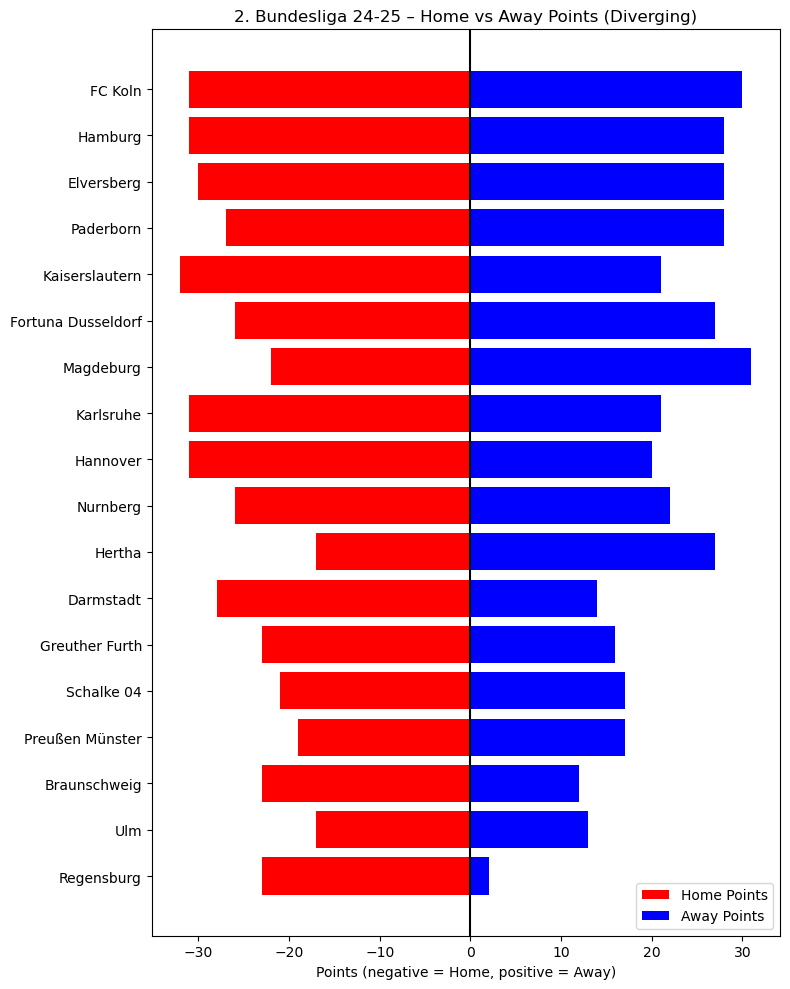

In [15]:
def plot_home_away_diverging(df, season):
    d = df[df["Season"]==season]

    # Heim- und Auswärtspunkte je Team
    home = d.groupby("HomeTeam")["FTR"].apply(lambda s: (s=="H").sum()*3 + (s=="D").sum()).reset_index()
    away = d.groupby("AwayTeam")["FTR"].apply(lambda s: (s=="A").sum()*3 + (s=="D").sum()).reset_index()
    home.columns, away.columns = ["Team","HomePts"], ["Team","AwayPts"]

    # Gesamttabelle (für Platzierung)
    long = pd.concat([
        pd.DataFrame({"Team": d["HomeTeam"], "Pts": d["FTR"].map({"H":3,"D":1,"A":0}).astype(int)}),
        pd.DataFrame({"Team": d["AwayTeam"], "Pts": d["FTR"].map({"A":3,"D":1,"H":0}).astype(int)})
    ])
    table = long.groupby("Team")["Pts"].sum().reset_index().sort_values("Pts", ascending=False).reset_index(drop=True)
    table["Pos"] = table.index + 1

    # zusammenführen
    m = table.merge(home, on="Team").merge(away, on="Team")
    m = m.sort_values("Pos")  # Platzierung
    m = m.set_index("Team")

    # Plot
    fig, ax = plt.subplots(figsize=(8,10))
    ax.barh(m.index, -m["HomePts"], color="red", label="Home Points")   # nach links
    ax.barh(m.index,  m["AwayPts"], color="blue", label="Away Points") # nach rechts

    ax.axvline(0, color="black")   # Mittellinie
    ax.set_title(f"2. Bundesliga {season} – Home vs Away Points (Diverging)")
    ax.set_xlabel("Points (negative = Home, positive = Away)")
    ax.legend()
    ax.invert_yaxis()   # <- jetzt ist Platz 1 oben
    plt.tight_layout()
    plt.show()

# Beispiel
plot_home_away_diverging(df_done, "24-25")
